In [1]:
from __future__ import division
import csv
import numpy as np
import pandas as pd
import math
from scipy.optimize import bisect
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pylab as pl
get_ipython().magic(u'matplotlib inline')

In [1]:
grid_data=pd.read_csv('results_GIS_SF_2.csv')
people_range=range(100,10600,500)
#select grid where pop_density>0
grid_data=grid_data[grid_data.pop_density_current != 0]

NameError: name 'pd' is not defined

In [3]:
#import data
Electricity_EF_data = pd.read_csv('Electricity_EF_data.csv')
pipe_construction_data = pd.read_csv('pipe_construction_data.csv')
pipe_diameter_data = pd.read_csv('pipe_diameter_data2.csv')
pipe_maintenance_data = pd.read_csv('pipe_maintenance_data.csv')
pump_construction_data = pd.read_csv('pump_construction_data.csv')
slope_index_data = pd.read_csv('slope_index_data.csv')
steel_data = pd.read_csv('steel_data.csv')
transportation_data = pd.read_csv('transportation_data.csv')
treatment_data = pd.read_csv('treatment_data.csv')


#user set parameters
demand=0.2 #m3/person-day

Electric_Utility="SFPUC"
Electric_Utility_pipes="2010 CA Power Mix"
pipe_material="PE"
miles_to_disposal=30
miles_transport=50
discount=0.04
lifetime_treatment=25
lifetime=50
#pop_density=500 #people/km2
street_density=8000 #m/km2
pump_operating_fraction=0.8
storage_days=3
tank_height=3
retention_time=6 #h
consumption_pressure=20 #m


Treatment_operational_energy_m3=2.4 #MJ/m3
Treatment_capital_energy_m3=0.5 #MJ/m3
Treatment_operational_GHG_m3=0.25  #kgCO2/m3
Treatment_capital_GHG_m3= 0.07  #kgCO2/m3


#specify model parameters
electricity_cost=0.12 #$/kwh
specific_weight_water=9.807 #KN/m3
water_density=1000 #kg/m3
gravity=9.8 #m/s2
excavation_cost=4.6 #$/m3
excavation_energy=153 #MJ/m3
excavation_GHG=12 #kgCO2/m3
motor_efficiency=0.95
transport_cost=0.13 #$/ton-mile
transport_energy=8.16 #MJ/ton-mile
transport_GHG=0.656 #kgCo2/ton-mile
steel_cost=0.769 #$/kg
steel_GHG=1.3 #kgCO2/kg
steel_energy=17.5
steel_sheet_mass=186.9
steel_sheet_area=3.72
cement_energy=2820 #MJ/m3
cement_GHG=330 #kgCO2/m3
cement_cost=0.00005 #$/kg
reinf_concrete_energy=190 #Mj/m3
reinf_concrete_GHG=170 #kgCo2/m3
reinf_concrete_cost=115 # $/m3
reinf_concrete_density = 2400 #kg/m3
media_filtration_energy=0.05 #kWh/m3 (Opportunities and Economics of water reuse)
flocculation_energy=0.05 #kWh/m3 of tank volume (Lee,2010)

#specify treatment parameters
MBR_GHG=0.23
sludge_mass=0.1 #kg/m3 water treated
percent_fertilizer= 0.5 #percent of sludge disposed as fertilizer
percent_landfill= (1-percent_fertilizer) 
landfill_GHG=0.04
fertilizer_GHG=0
chlorine_energy=42 #MJ/kg
chlorine_GHG=0.74 #kg/kg
chlorine_mass=15 #mg/L
chlorine_retention_time=1 #h
Alum_density=120 #mg/L 
Alum_energy=0.91 #MJ/kg
Alum_GHG=0.07 #kgCO2/kg

RSF_rate=293 #m3/m2-day (Tchobanoglous small and decentralized)
RSF_sand_depth=0.6 #m (Tchobanoglous small and decentralized - deep bed sand) 

RSF_anthracite_depth=0.75
RSF_sand_density=1602 #kg/m3
RSF_sand_energy=0.147 #MJ/kg
RSF_sand_GHG=0.0104 #kgCO2/kg
RSF_anthracite_density=1100 #kg/m3
RSF_anthracite_energy=0.231 #MJ/kg
RSF_anthracite_GHG=0.06 #kgCO2/kg
flocculation_time=1 #hours
coagulation_time=0.3 #hours

Water_energy_intensity=1.12 #kWh/m3
Water_GHG_intensity=0.36 #kgCO2/m3

#Results
Scale_final=[]
grid_ID_final=[]

elevation_data_final=[]
pump_hp_final=[]
pipe_diameter_final=[]


Total_conveyance_capital_cost_final=[]
Total_conveyance_capital_GHG_final=[]
Total_conveyance_capital_energy_final=[]
Total_conveyance_operational_cost_final=[]
Total_conveyance_operational_GHG_final=[]
Total_conveyance_operational_energy_final=[]

Total_Treatment_Capital_cost_final=[]
Total_Treatment_Capital_energy_final=[]
Total_Treatment_Capital_GHG_final=[]
Total_Treatment_Operational_cost_final=[]
Total_Treatment_Operational_energy_final=[]
Total_Treatment_Operational_GHG_final=[]
Total_Treatment_energy_offsets=[]
Total_Treatment_GHG_offsets=[]

Total_Treatment_operational_energy_final=[]
Total_Treatment_capital_energy_final=[]
Total_Treatment_operational_GHG_final=[]
Total_Treatment_capital_GHG_final=[]

Total_Cost_final=[]
Total_Energy_final=[]
Total_GHG_final=[]


Pipe_capital_cost_final=[]
Pump_capital_cost_final=[]
Tank_capital_cost_final=[]
Pipe_capital_GHG_final=[]
Pump_capital_GHG_final=[]
Tank_capital_GHG_final=[]
Pipe_capital_energy_final=[]
Pipe_construction_energy_final=[]
Pipe_excavation_energy_final=[]
Pipe_transport_energy_final=[]
Pump_capital_energy_final=[]
Tank_capital_energy_final=[]
tank_const_energy_final=[]
tank_transport_energy_final=[]
pump_construction_energy_final=[]
pump_transport_energy_final=[]

Pipe_construction_GHG_final=[]
Pipe_excavation_GHG_final=[]
Pipe_transport_GHG_final=[]
Pump_capital_GHG_final=[]
Tank_capital_GHG_final=[]
tank_const_GHG_final=[]
tank_transport_GHG_final=[]
pump_construction_GHG_final=[]
pump_transport_GHG_final=[]

Pipe_operat_cost_final=[]
Pump_operat_cost_final=[]
Pipe_operat_GHG_final=[]
Pump_operat_GHG_final=[]
Pipe_operat_energy_final=[]
Pump_operat_energy_final=[]

MBR_Capital_energy_final=[]
MBR_Capital_GHG_final=[]
CoagFlocc_Capital_energy_final=[]
CoagFlocc_Capital_GHG_final=[]

MBR_Operational_energy_final=[]
MBR_Operational_GHG_final=[]
Chlorine_operational_energy_final=[]
Chlorine_operational_GHG_final=[]
RSF_Operational_energy_final=[]
RSF_Operational_GHG_final=[]

Sludge_transport_energy_final=[]
Sludge_transport_GHG_final=[]
Sludge_disposal_GHG_final=[]

Treatment_capital_energy_final=[]
Treatment_capital_GHG_final=[]
Treatment_operational_energy_final=[]
Treatment_operational_GHG_final=[]

RSF_capital_energy_final=[]
RSF_capital_GHG_final=[]

CoagFlocc_Capital_energy_final=[]
CoagFlocc_Capital_GHG_final=[]
CoagFlocc_Operational_energy_final=[]
CoagFlocc_Operational_GHG_final=[]
Chlorine_operational_energy_final=[]
Chlorine_operational_GHG_final=[]

Headloss_total=[]
Head_total=[]
Pressure_total=[]
dynamic_total=[]
Total_conveyance_operational_energy_collection=[]
Total_conveyance_operational_GHG_collection=[]
                


elevation_data=[]

In [4]:
slope_index_grid=grid_data['slope_index']
grid_index=grid_data['grid_ID']
length_centr=grid_data['length_m']
z_max=grid_data['Head_central_elevation']
pop_dens=grid_data['pop_density_current']
collection_energy=grid_data['collection_MJ_m3']
slp_index=slope_index_grid.tolist()
grd_index=grid_index.tolist()
z_max_rt=z_max.tolist()
length_cnt=length_centr.tolist()
pop_dens_index=pop_dens.tolist()
collection_energy_index=collection_energy.tolist()
grid_slope_length=zip(grd_index,slp_index,length_cnt,z_max_rt,pop_dens_index,collection_energy_index)


In [5]:
# ##Conveyance

#Iterate for each grid
for value in grid_slope_length:
    grid_ID=value[0]
    slope_index_grid=value[1]
    length_centralized_m=value[2]
    z_max_route=value[3]
    pop_density=value[4]
    collection_energy=value[5]
    
    #Calculate pipe length and elevation
    for i in people_range:
        people=i
        pipe_length_dec=people/pop_density*street_density
        if pipe_length_dec>street_density/2:
            pipe_length_dec=street_density/2
        if people>pop_density/2:
            elevation_dec=500*slope_index_grid
        else: 
            elevation_dec=math.sqrt(people/pop_density)*slope_index_grid*1000
        if elevation_dec==0:
            elevation_dec=0.1
        pipe_length=pipe_length_dec+length_centralized_m
        elevation=elevation_dec+z_max_route

        
        #Calculate pipe diameter
        total_dem=people*demand/(24) #m3/h
        if total_dem<1:
            total_dem=1
        else:
            total_dem=round(total_dem)

        pd_data = pipe_diameter_data
        k=pd_data.set_index('Flow_Rate_m3_h')
        pipe_diameter=k.PVC_Diameter_mm[total_dem]
        

        total_demand=people*demand/(24) #m3/h
        pipe_area=math.pi*(pipe_diameter*0.001/2)**2
        pipe_velocity=total_dem/(3600*pipe_area)

        #normDiameterList = (40, 50, 63, 75, 90, 100, 125, 160, 200, 250, 300, 350, 400, 450, 500, 600) 
        normDiameterList = (50, 100, 160, 200, 350, 375, 450)
        index=normDiameterList.index(pipe_diameter)
        index=index+1
        pipe_diameter=normDiameterList[index]

        h1=0.03*pipe_length/((pipe_diameter)*0.001)*(pipe_velocity**2)/(2*9.81)
        threshold=0.30*(elevation)

        while h1>threshold:
            index=index+1
            pipe_diameter=normDiameterList[index]
            pipe_area_2=math.pi*(pipe_diameter*0.001/2)**2
            pipe_velocity=total_demand/(3600*pipe_area_2)
            h1=0.03*pipe_length/((pipe_diameter)*0.001)*(pipe_velocity**2)/(2*9.81)

        if pipe_velocity<=2.5:
            pipe_diameter=pipe_diameter
        else:
            index=index+1
            pipe_diameter=normDiameterList[index]

        pipe_area_2=math.pi*(pipe_diameter*0.001/2)**2
        pipe_velocity_2=total_demand/(3600*pipe_area_2)


        #Pipes
        #Piping construction
        pipe_construction_df=pipe_construction_data[(pipe_construction_data['Material'] == (pipe_material))]
        h=pipe_construction_df.set_index('size_mm')
        pipe_emissions_EF=h.Emissions_kgCO2_eq_m[pipe_diameter]
        pipe_energy_EF=h.Embodied_Energy_MJ_kg[pipe_diameter]
        pipe_cost_EF=h.cost_2012_m[pipe_diameter]
        pipe_weight=h.Wt_kg_m[pipe_diameter]
        pipe_excav_vol=h.Excavation_vol_m3_m[pipe_diameter]

        #Electricity GHG
        Electricity_GHG_df=Electricity_EF_data[(Electricity_EF_data['Name'] == (Electric_Utility))]
        Electricity_GHG_LCA=Electricity_GHG_df['EF_Lifecycle_kg_kWh'].iloc[0]
        Electricity_GHG_direct=Electricity_GHG_df['EF_Direct_kg_kWh'].iloc[0]
        
        Electricity_GHG_df_pipes=Electricity_EF_data[(Electricity_EF_data['Name'] == (Electric_Utility_pipes))]
        Electricity_GHG_LCA_pipes=Electricity_GHG_df['EF_Lifecycle_kg_kWh'].iloc[0]
        
        Pipe_const_cost=pipe_length*(pipe_cost_EF)/lifetime
        Pipe_const_energy=(pipe_length*(pipe_energy_EF)*(pipe_weight))/lifetime
        #Pipe_const_GHG=Pipe_const_energy/3.6*Electricity_GHG_LCA_pipes
        Pipe_const_GHG=pipe_emissions_EF*pipe_length/lifetime

        
        #Piping excavation
        Pipe_mass=pipe_length*(pipe_weight)
        Pipe_excavation_vol=pipe_length*(pipe_excav_vol)
        Pipe_excavation_cost=Pipe_excavation_vol*(excavation_cost)/lifetime
        Pipe_excavation_energy=Pipe_excavation_vol*(excavation_energy)/lifetime
        Pipe_excavation_GHG=Pipe_excavation_vol*(excavation_GHG)/lifetime

        #Piping transportation
        Pipe_transport_cost=transport_cost*miles_transport*Pipe_mass/(1000*lifetime)
        Pipe_transport_energy=transport_energy*miles_transport*Pipe_mass/(1000*lifetime)
        Pipe_transport_GHG=transport_GHG*miles_transport*Pipe_mass/(1000*lifetime)


        #Piping maintenance
        pipe_maintenance_data['cost_discount_y'] = pipe_maintenance_data['cost_m']*pipe_length/((1+discount)**(pipe_maintenance_data['year_']-1))
        pipe_maintenance_data['energy_y'] = pipe_maintenance_data['KWh_m']*pipe_length*3.6
        pipe_maintenance_data['GHG_y'] = pipe_maintenance_data['energy_y']/3.6*Electricity_GHG_LCA_pipes

        pipe_maint_lifetime=pipe_maintenance_data[pipe_maintenance_data['year_'] <= lifetime]
        pipe_maint_cost=pipe_maint_lifetime['cost_discount_y'].sum()/lifetime
        pipe_maint_GHG=pipe_maint_lifetime['GHG_y'].sum()/lifetime
        pipe_maint_energy=pipe_maint_lifetime['energy_y'].sum()/lifetime



        #Totals Pipes
        Pipe_capital_cost=Pipe_const_cost+Pipe_excavation_cost+Pipe_transport_cost
        Pipe_capital_energy=Pipe_const_energy+Pipe_excavation_energy+Pipe_transport_energy
        Pipe_capital_GHG=Pipe_const_GHG+Pipe_excavation_GHG+Pipe_transport_GHG

        Pipe_operat_cost=pipe_maint_cost
        Pipe_operat_energy=pipe_maint_energy
        Pipe_operat_GHG=pipe_maint_GHG


        #Calculate headloss
        headloss=0.03*pipe_length/((pipe_diameter)*0.001)*(pipe_velocity_2**2)/(2*9.81)


        #Calculate Pressure
        head=elevation-0
        pressure=((pipe_velocity_2**2)*water_density/2+(consumption_pressure/10*101325)+(head*gravity*water_density)+(headloss*gravity*water_density))
        total_head=pressure/(water_density*gravity)

        headloss_m=headloss
        head_m=head
        pressure_m=consumption_pressure
        dynamic_pressure=((pipe_velocity_2**2)/(2*gravity))
        
        
        
        #Calculate pump effieciency
        p_hp=(specific_weight_water*total_head*(total_demand/3600)/(0.4*motor_efficiency))*1.34
        if p_hp<3:
            pump_efficiency=0.4
        elif 3<=p_hp<7:
            pump_efficiency=0.45
        elif 7<=p_hp<15:
            pump_efficiency=0.5
        elif 15<=p_hp<40:
            pump_efficiency=0.55
        elif 40<=p_hp<60:
            pump_efficiency=0.6
        else:
            pump_efficiency=0.7
        p_hp=(specific_weight_water*total_head*(total_demand/3600)/(pump_efficiency*motor_efficiency))*1.34
        
        headloss_energy=specific_weight_water*headloss_m*(1/(24*365*3600))*pump_operating_fraction*24*365/(pump_efficiency*motor_efficiency)
        head_energy=specific_weight_water*head_m*(1/(24*365*3600))*pump_operating_fraction*24*365/(pump_efficiency*motor_efficiency)
        pressure_energy=specific_weight_water*pressure_m*(1/(24*365*3600))*pump_operating_fraction*24*365/(pump_efficiency*motor_efficiency)
        dynamic_energy=specific_weight_water*dynamic_pressure*(1/(24*365*3600))*pump_operating_fraction*24*365/(pump_efficiency*motor_efficiency)
      
    #Calculating actual pump horsepower
        Pump_energy_hp=p_hp*3.6*8765/1.34*pump_operating_fraction
        hp=round(((Pump_energy_hp/3.6)*1.34/8765),2)
        if hp<=0.5:
            pump_hp=round(((Pump_energy_hp/3.6)*1.34/8765)*2,1)/2
        elif 0.5<hp<10:
            pump_hp=round(((Pump_energy_hp/3.6)*1.34/8765),0)
        elif 10<=hp<100:
            pump_hp=round(((Pump_energy_hp/3.6)*1.34/8765)/10,0)*10
        else:
            pump_hp=round(((Pump_energy_hp/3.6)*1.34/8765)*2/1000,1)*1000/2
            
        if pump_hp<0.05:
            pump_hp=0.05

 

        #Pump Operation
        Pump_operat_energy=specific_weight_water*total_head*(total_demand/3600)*pump_operating_fraction*24*365/(pump_efficiency*motor_efficiency)*3.6
        Pump_operat_GHG=Pump_operat_energy/3.6*Electricity_GHG_LCA
        Pump_operat_cost=Pump_operat_energy/3.6*electricity_cost



        #Pump Construction
        t=pump_construction_data.set_index('Rating_hp')
        pump_cost_EF=t.Cost_2012[pump_hp]
        pump_energy_EF=t.Embodied_Energy_MJ[pump_hp]
        pump_GHG_EF=t.Emissions_kgCO_eq[pump_hp]
        pump_weight=t.Wt_kg[pump_hp]

        pump_construction_energy=pump_energy_EF/lifetime_treatment
        pump_construction_GHG=pump_GHG_EF/lifetime_treatment
        pump_construction_cost=pump_cost_EF/lifetime_treatment

        pump_transport_cost=pump_weight*miles_transport*transport_cost/(1000*lifetime_treatment)
        pump_transport_energy=pump_weight*miles_transport*transport_energy/(1000*lifetime_treatment)
        pump_transport_GHG=pump_weight*miles_transport*transport_GHG/(1000*lifetime_treatment)


        #Totals Pumps
        Pump_capital_cost=pump_construction_cost+pump_transport_cost
        Pump_capital_energy=pump_construction_energy+pump_transport_energy
        Pump_capital_GHG=pump_construction_GHG+pump_transport_GHG


        
        #Tanks
        tank_volume=storage_days*total_demand*24 #m3
        tank_radius=math.sqrt(tank_volume/(math.pi*tank_height))
        tank_area=2*math.pi*tank_radius*tank_height+2*math.pi*tank_radius**2
        tank_cement_volume=0.1*tank_area
        tank_mass_steel=round(tank_area/steel_sheet_area,0)*steel_sheet_mass
        
        
        #tank construction
        tank_const_cost=tank_cement_volume*reinf_concrete_cost/lifetime
        tank_const_energy=tank_cement_volume*reinf_concrete_energy/lifetime
        tank_const_GHG=tank_cement_volume*reinf_concrete_GHG/lifetime

        #tank transport
        tank_transport_cost=(tank_cement_volume*reinf_concrete_density)*transport_cost*miles_transport/(lifetime*1000)
        tank_transport_energy=(tank_cement_volume*reinf_concrete_density)*transport_energy*miles_transport/(lifetime*1000)
        tank_transport_GHG=(tank_cement_volume*reinf_concrete_density)*transport_GHG*miles_transport/(lifetime*1000)



        #Tanks Totals
        Tank_capital_cost=tank_const_cost+tank_transport_cost
        Tank_capital_energy=tank_const_energy+tank_transport_energy
        Tank_capital_GHG=tank_const_GHG+tank_transport_GHG

        
        demand_day=total_demand*24

        #Conveyance Totals
        
        Collection_pumping_energy=demand_day*collection_energy*365 #MJ/y
        Collection_pumping_GHG=Collection_pumping_energy/3.6*Electricity_GHG_LCA
        Total_conveyance_capital_cost_y=Pipe_capital_cost+Pump_capital_cost+Tank_capital_cost
        Total_conveyance_capital_GHG_y=Pipe_capital_GHG+Pump_capital_GHG+Tank_capital_GHG
        Total_conveyance_capital_energy_y=Pipe_capital_energy+Pump_capital_energy+Tank_capital_energy

        Total_conveyance_operational_cost_y=Pipe_operat_cost+Pump_operat_cost
        Total_conveyance_operational_GHG_y=Pipe_operat_GHG+Pump_operat_GHG
        Total_conveyance_operational_energy_y=Pipe_operat_energy+Pump_operat_energy
        
                
        ###Treatment
        
        #Total Centralized Treatment
        Central_treatment_operational_energy_y=Treatment_operational_energy_m3*demand_day*365
        Central_treatment_capital_energy_y=Treatment_capital_energy_m3*demand_day*365

        Central_treatment_operational_GHG_y=Treatment_operational_GHG_m3*demand_day*365
        Central_treatment_capital_GHG_y=Treatment_capital_GHG_m3*demand_day*365
        
        #Treatment for Recycling
        
        #Rapid Sand Filtration
        RSF_Area=people*demand/RSF_rate #m2
        RSF_sand_volume=RSF_Area*(RSF_sand_depth) #m3
        RSF_anthracite_volume=RSF_Area*(RSF_anthracite_depth) #m3
        RSF_volume=RSF_sand_volume+RSF_anthracite_volume
        RSF_surface_area=RSF_Area+8*RSF_volume/RSF_Area
        
        RSF_tank_mass_steel=round(RSF_surface_area/steel_sheet_area,0)*steel_sheet_mass
        RSF_sand_mass=RSF_sand_density*RSF_sand_volume
        RSF_anthracite_mass=RSF_anthracite_density*RSF_anthracite_volume

        # RSF tank construction
        RSF_tank_const_energy=RSF_tank_mass_steel*steel_energy/lifetime
        RSF_tank_const_GHG=RSF_tank_mass_steel*steel_GHG/lifetime

        # RSF_tank transport
        RSF_tank_transport_energy=RSF_tank_mass_steel*transport_energy*miles_transport/(lifetime*1000)
        RSF_tank_transport_GHG=RSF_tank_mass_steel*transport_GHG*miles_transport/(lifetime*1000)
        
        # RSF sand construction
        RSF_sand_const_energy=(RSF_sand_mass*RSF_sand_energy+RSF_anthracite_mass*RSF_anthracite_energy)/lifetime_treatment
        RSF_sand_const_GHG=(RSF_sand_mass*RSF_sand_GHG+RSF_anthracite_mass*RSF_anthracite_GHG)/lifetime_treatment

        # RSF_sand transport
        RSF_sand_transport_energy=(RSF_sand_mass+RSF_anthracite_mass)*transport_energy*miles_transport/(lifetime_treatment*1000)
        RSF_sand_transport_GHG=(RSF_sand_mass+RSF_anthracite_mass)*transport_GHG*miles_transport/(lifetime_treatment*1000)

        
        #Coagulation & Flocculation
        Coagulation_volume=people*demand/24*coagulation_time
        Coagulation_radius=math.sqrt(Coagulation_volume/(math.pi*1))
        Flocculation_volume=people*demand/24*flocculation_time
        Flocculation_radius=math.sqrt(Flocculation_volume/(math.pi*1))
        Coagu_Flocc_cement_volume=(((Coagulation_radius+0.1)**2-(Coagulation_radius)**2)*3.14)+((Flocculation_radius+0.1)**2-(Flocculation_radius)**2)*3.14
        Coag_Flocc_Capital_energy=Coagu_Flocc_cement_volume*reinf_concrete_energy/lifetime_treatment
        
        
        
        #Alum addition
        Alum_mass=Alum_density*demand_day/1000*365
        Alum_manufacturing_energy=Alum_mass*Alum_energy
        Alum_transport_energy=Alum_mass*transport_energy*miles_transport/1000
        Alum_manufacturing_GHG=Alum_mass*Alum_GHG
        Alum_transport_GHG=Alum_mass*transport_GHG*miles_transport/1000
        Alum_operational_energy_y=Alum_manufacturing_energy+Alum_transport_energy
        Alum_operational_GHG_y=Alum_manufacturing_GHG+Alum_transport_GHG
        
        #Coagulation & Flocculation Totals
        CoagFlocc_Capital_energy_y=Coagu_Flocc_cement_volume*reinf_concrete_energy/lifetime_treatment
        CoagFlocc_Capital_GHG_y=Coagu_Flocc_cement_volume*reinf_concrete_GHG/lifetime_treatment
        #CoagFlocc_Operational_energy_y=(13.486*(demand_day**(-0.303)))*365*demand_day+Alum_operational_energy_y
        #CoagFlocc_Operational_GHG_y=CoagFlocc_Operational_energy_y/3.6*Electricity_GHG_LCA+Alum_operational_GHG_y
        CoagFlocc_Operational_energy_y=Alum_operational_energy_y+flocculation_energy*3.6*demand_day*365
        CoagFlocc_Operational_GHG_y=(flocculation_energy*demand_day*365)*Electricity_GHG_LCA+Alum_operational_GHG_y
        
                    
        #Chlorination
        chlorine_volume=chlorine_retention_time/24*demand_day
        chlorine_radius=math.sqrt(chlorine_volume/(math.pi*1))
        chlorine_cement_volume=((2*math.pi*chlorine_radius*1)+math.pi*chlorine_radius**2)*0.10
        
        Chlorine_manufacturing_energy_y=chlorine_mass*chlorine_energy*demand_day*365/1000+chlorine_cement_volume*reinf_concrete_energy/lifetime_treatment
        Chlorine_manufacturing_GHG_y=chlorine_mass*chlorine_GHG*demand_day*365/1000+chlorine_cement_volume*reinf_concrete_GHG/lifetime_treatment
        Chlorine_transport_energy_y=chlorine_mass*transport_energy*demand_day*365*miles_transport/1000000
        Chlorine_transport_GHG_y=chlorine_mass*transport_GHG*demand_day*365*miles_transport/1000000
        Chlorine_operational_energy_y=Chlorine_manufacturing_energy_y+Chlorine_transport_energy_y
        Chlorine_operational_GHG_y=Chlorine_manufacturing_GHG_y+Chlorine_transport_GHG_y
        
    
        #RSF Totals
        RSF_capital_energy_y=RSF_tank_const_energy+RSF_sand_const_energy+RSF_sand_transport_energy+RSF_tank_transport_energy
        RSF_capital_GHG_y=RSF_tank_const_GHG+RSF_sand_const_GHG+RSF_sand_transport_GHG+RSF_tank_transport_GHG

        #RSF operation
        RSF_operational_energy=media_filtration_energy*3.6*people*demand*365
        RSF_operational_GHG=RSF_operational_energy/3.6*Electricity_GHG_LCA

        #Tanks Totals
        Tank_capital_cost=tank_const_cost+tank_transport_cost
        Tank_capital_energy=tank_const_energy+tank_transport_energy
        Tank_capital_GHG=tank_const_GHG+tank_transport_GHG
        
        #Sludge
        Sludge_transport_energy_y=sludge_mass*0.2*demand_day*365*miles_to_disposal*transport_energy/1000
        Sludge_transport_GHG_y=sludge_mass*0.2*demand_day*365*miles_to_disposal*transport_GHG/1000
        Sludge_disposal_GHG_y=landfill_GHG*sludge_mass*0.2*demand_day*365*percent_landfill/(1000)+fertilizer_GHG*sludge_mass*0.2*demand_day*365*percent_fertilizer/(1000)
                
        Total_Treatment_Capital_energy=Central_treatment_capital_energy_y+RSF_capital_energy_y+CoagFlocc_Capital_energy_y
        Total_Treatment_Operational_energy=Central_treatment_operational_energy_y+CoagFlocc_Operational_energy_y+RSF_operational_energy+Chlorine_operational_energy_y+Sludge_transport_energy_y
        Total_Treatment_Capital_GHG=Central_treatment_capital_GHG_y+RSF_capital_GHG_y+CoagFlocc_Capital_GHG_y
        Total_Treatment_Operational_GHG=Central_treatment_operational_GHG_y+CoagFlocc_Operational_GHG_y+RSF_operational_GHG+Chlorine_operational_GHG_y+Sludge_transport_GHG_y+Sludge_disposal_GHG_y
        
        Treatment_energy_offsets_y=-(people*demand*365*Water_energy_intensity)
        Treatment_GHG_offsets_y=-(people*demand*365*Water_GHG_intensity)
 
      
        Total_Energy_y=Total_conveyance_capital_energy_y+Total_conveyance_operational_energy_y+Total_Treatment_Capital_energy+Total_Treatment_Operational_energy+Collection_pumping_energy
        Total_GHG_y=Total_conveyance_capital_GHG_y+Total_conveyance_operational_GHG_y+Total_Treatment_Capital_GHG+Total_Treatment_Operational_GHG+Collection_pumping_GHG

        #Results
        Scale_final.append(people)
        grid_ID_final.append(grid_ID)
        Total_conveyance_capital_cost_final.append(Total_conveyance_capital_cost_y)
        Total_conveyance_capital_GHG_final.append(Total_conveyance_capital_GHG_y)
        Total_conveyance_capital_energy_final.append(Total_conveyance_capital_energy_y)
        Total_conveyance_operational_cost_final.append(Total_conveyance_operational_cost_y)
        Total_conveyance_operational_GHG_final.append(Total_conveyance_operational_GHG_y)
        Total_conveyance_operational_energy_final.append(Total_conveyance_operational_energy_y)
        Total_conveyance_operational_energy_collection.append(Collection_pumping_energy)
        Total_conveyance_operational_GHG_collection.append(Collection_pumping_GHG)
        
        
        Headloss_total.append(headloss_energy)
        Head_total.append(head_energy)
        Pressure_total.append(pressure_energy)
        dynamic_total.append(dynamic_energy)
                
        Total_Energy_final.append(Total_Energy_y)
        Total_GHG_final.append(Total_GHG_y)
        
        Total_Treatment_operational_energy_final.append(Total_Treatment_Operational_energy)
        Total_Treatment_capital_energy_final.append(Total_Treatment_Capital_energy)
        Total_Treatment_operational_GHG_final.append(Total_Treatment_Operational_GHG)
        Total_Treatment_capital_GHG_final.append(Total_Treatment_Capital_GHG)

    #Total_Treatment_Capital_cost_final.append(Total_Treatment_Capital_cost)
    #Total_Treatment_Capital_energy_final.append(Total_Treatment_Capital_energy)
    #Total_Treatment_Capital_GHG_final.append(Total_Treatment_Capital_GHG)
    #Total_Treatment_Operational_cost_final.append(Total_Treatment_Operational_cost)
    #Total_Treatment_Operational_energy_final.append(Total_Treatment_Operational_energy)
    #Total_Treatment_Operational_GHG_final.append(Total_Treatment_Operational_GHG)

        Pipe_capital_cost_final.append(Pipe_capital_cost)
        Pump_capital_cost_final.append(Pump_capital_cost)
        Tank_capital_cost_final.append(Tank_capital_cost)
        Pipe_capital_GHG_final.append(Pipe_capital_GHG)
        Pump_capital_GHG_final.append(Pump_capital_GHG)
        Tank_capital_GHG_final.append(Tank_capital_GHG)
        Pipe_capital_energy_final.append(Pipe_capital_energy)
        Pump_capital_energy_final.append(Pump_capital_energy)
        Tank_capital_energy_final.append(Tank_capital_energy)

        Pipe_operat_cost_final.append(Pipe_operat_cost)
        Pump_operat_cost_final.append(Pump_operat_cost)
        Pipe_operat_GHG_final.append(Pipe_operat_GHG)
        Pump_operat_GHG_final.append(Pump_operat_GHG)
        Pipe_operat_energy_final.append(Pipe_operat_energy)
        Pump_operat_energy_final.append(Pump_operat_energy)
        
        Pipe_construction_energy_final.append(Pipe_const_energy)
        Pipe_excavation_energy_final.append(Pipe_excavation_energy)
        Pipe_transport_energy_final.append(Pipe_transport_energy)
        tank_const_energy_final.append(tank_const_energy)
        tank_transport_energy_final.append(tank_transport_energy)
        pump_construction_energy_final.append(pump_construction_energy)
        pump_transport_energy_final.append(pump_transport_energy)
        
        Pipe_construction_GHG_final.append(Pipe_const_GHG)
        Pipe_excavation_GHG_final.append(Pipe_excavation_GHG)
        Pipe_transport_GHG_final.append(Pipe_transport_GHG)
        tank_const_GHG_final.append(tank_const_GHG)
        tank_transport_GHG_final.append(tank_transport_GHG)
        pump_construction_GHG_final.append(pump_construction_GHG)
        pump_transport_GHG_final.append(pump_transport_GHG)
        
        Treatment_capital_energy_final.append(Central_treatment_capital_energy_y)
        Treatment_capital_GHG_final.append(Central_treatment_capital_GHG_y)
        Treatment_operational_energy_final.append(Central_treatment_operational_energy_y)
        Treatment_operational_GHG_final.append(Central_treatment_operational_GHG_y)
        
        RSF_capital_energy_final.append(RSF_capital_energy_y)
        RSF_capital_GHG_final.append(RSF_capital_GHG_y)
        RSF_Operational_energy_final.append(RSF_operational_energy)
        RSF_Operational_GHG_final.append(RSF_operational_GHG)
        CoagFlocc_Capital_energy_final.append(CoagFlocc_Capital_energy_y)
        CoagFlocc_Capital_GHG_final.append(CoagFlocc_Capital_GHG_y)
        CoagFlocc_Operational_energy_final.append(CoagFlocc_Operational_energy_y)
        CoagFlocc_Operational_GHG_final.append(CoagFlocc_Operational_GHG_y)
        Chlorine_operational_energy_final.append(Chlorine_operational_energy_y)
        Chlorine_operational_GHG_final.append(Chlorine_operational_GHG_y)
        Sludge_transport_energy_final.append(Sludge_transport_energy_y)
        Sludge_transport_GHG_final.append(Sludge_transport_GHG_y)
        Sludge_disposal_GHG_final.append(Sludge_disposal_GHG_y)
        

        elevation_data_final.append(elevation)
        pump_hp_final.append(pump_hp)
        pipe_diameter_final.append(pipe_diameter)
       
        
        Total_Treatment_energy_offsets.append(Treatment_energy_offsets_y)
        Total_Treatment_GHG_offsets.append(Treatment_GHG_offsets_y)



C:\Users\Olga\Anaconda2\lib\site-packages\ipykernel\__main__.py:37: FutureWarning: scalar indexers for index type Int64Index should be integers and not floating point


In [6]:
#total_energy DataFrame
label_pairs = zip(grid_ID_final,Scale_final,Total_conveyance_capital_energy_final,Total_conveyance_operational_energy_final,Total_Treatment_operational_energy_final,Total_Treatment_capital_energy_final,Total_Energy_final,Total_conveyance_operational_energy_collection)
total_energy=pd.DataFrame(label_pairs)
total_energy.columns = ['grid_ID','People', 'Total_conveyance_capital_energy_central_y','Total_conveyance_operational_energy_central_y','Total_Treatment_operational_energy_y','Total_Treatment_capital_energy_y','Total_Energy_final_central_y','Total_conveyance_operational_energy_collection_y']
# total_energy['Scale']=(total_energy['People'])*0.2*365
# total_energy['Total_conveyance_capital_energy_central_m3']=(total_energy['Total_conveyance_capital_energy_central_y'])/(total_energy['Scale'])
# total_energy['Total_conveyance_operational_energy_central_m3']=(total_energy['Total_conveyance_operational_energy_central_y'])/(total_energy['Scale'])
# total_energy['Total_Treatment_operational_energy_m3']=(total_energy['Total_Treatment_operational_energy_y'])/(total_energy['Scale'])
# total_energy['Total_Treatment_capital_energy_m3']=(total_energy['Total_Treatment_capital_energy_y'])/(total_energy['Scale'])
# total_energy['Total_Energy_final_central_m3']=(total_energy['Total_Energy_final_central_y'])/(total_energy['Scale'])
# total_energy['Total_conveyance_operational_energy_collection_m3']=(total_energy['Total_conveyance_operational_energy_collection_y'])/(total_energy['Scale'])

In [7]:
#total_GHG DataFrame
label_pairs = zip(grid_ID_final,Scale_final,Total_conveyance_capital_GHG_final,Total_conveyance_operational_GHG_final,Total_Treatment_capital_GHG_final,Total_Treatment_operational_GHG_final,Total_GHG_final,Total_conveyance_operational_GHG_collection)
total_GHG=pd.DataFrame(label_pairs)
total_GHG.columns = ['grid_ID','People', 'Total_conveyance_capital_GHG_central_y','Total_conveyance_operational_GHG_central_y','Total_Treatment_capital_GHG_y','Total_Treatment_operational_GHG_y','Total_GHG_final_central_y','Total_conveyance_operational_GHG_collection_y']
# total_GHG['Scale']=(total_GHG['People'])*0.2*365
# total_GHG['Total_conveyance_capital_GHG_central_m3']=(total_GHG['Total_conveyance_capital_GHG_central_y'])/(total_GHG['Scale'])
# total_GHG['Total_conveyance_operational_GHG_central_m3']=(total_GHG['Total_conveyance_operational_GHG_central_y'])/(total_GHG['Scale'])
# total_GHG['Total_Treatment_operational_GHG_m3']=(total_GHG['Total_Treatment_operational_GHG_y'])/(total_GHG['Scale'])
# total_GHG['Total_Treatment_capital_GHG_m3']=(total_GHG['Total_Treatment_capital_GHG_y'])/(total_GHG['Scale'])
# total_GHG['Total_GHG_final_central_m3']=(total_GHG['Total_GHG_final_central_y'])/(total_GHG['Scale'])
# total_GHG['Total_conveyance_operational_GHG_collection_m3']=(total_GHG['Total_conveyance_operational_GHG_collection_y'])/(total_GHG['Scale'])

In [8]:
#energy by process DataFrame
label_pairs = zip(grid_ID_final,Scale_final,Pipe_capital_energy_final,Pump_capital_energy_final,Tank_capital_energy_final, Pipe_operat_energy_final, Pump_operat_energy_final,Pipe_construction_energy_final,Pipe_excavation_energy_final,Pipe_transport_energy_final,tank_const_energy_final,tank_transport_energy_final,pump_construction_energy_final,pump_transport_energy_final,Treatment_operational_energy_final,Treatment_capital_energy_final,RSF_capital_energy_final,RSF_Operational_energy_final,CoagFlocc_Capital_energy_final,CoagFlocc_Operational_energy_final,Chlorine_operational_energy_final,Sludge_transport_energy_final,Total_conveyance_operational_energy_collection)
process_energy = pd.DataFrame(label_pairs)
process_energy.columns = ['grid_ID','People', 'Pipe_capital_energy_final_y','Pump_capital_energy_final_y','Tank_capital_energy_final_y', 'Pipe_operat_energy_final_y', 'Pump_operat_energy_final_y','Pipe_construction_energy_final_y','Pipe_excavation_energy_final_y','Pipe_transport_energy_final_y','tank_const_energy_final_y','tank_transport_energy_final_y','pump_construction_energy_final_y','pump_transport_energy_final_y','Treatment_operational_energy_y','Treatment_capital_energy_y','RSF_capital_energy_y','RSF_operational_energy_y','CoagFlocc_Capital_energy_y','CoagFlocc_Operational_energy_y','Chlorine_operational_energy_y','Sludge_transport_energy_final_y','Total_conveyance_operational_energy_collection_y']
# process_energy['Scale']=(process_energy['People'])*0.2*365
# process_energy['Pipe_capital_energy_final_m3']=(process_energy['Pipe_capital_energy_final_y'])/(process_energy['Scale'])
# process_energy['Pump_capital_energy_final_m3']=(process_energy['Pump_capital_energy_final_y'])/(process_energy['Scale'])
# process_energy['Tank_capital_energy_final_m3']=(process_energy['Tank_capital_energy_final_y'])/(process_energy['Scale'])
# process_energy['Pipe_operat_energy_final_m3']=(process_energy['Pipe_operat_energy_final_y'])/(process_energy['Scale'])
# process_energy['Pump_operat_energy_final_m3']=(process_energy['Pump_operat_energy_final_y'])/(process_energy['Scale'])
# process_energy['Pipe_construction_energy_final_m3']=(process_energy['Pipe_construction_energy_final_y'])/(process_energy['Scale'])
# process_energy['Pipe_excavation_energy_final_m3']=(process_energy['Pipe_excavation_energy_final_y'])/(process_energy['Scale'])
# process_energy['Pipe_transport_energy_final_m3']=(process_energy['Pipe_transport_energy_final_y'])/(process_energy['Scale'])
# process_energy['tank_const_energy_final_m3']=(process_energy['tank_const_energy_final_y'])/(process_energy['Scale'])
# process_energy['tank_transport_energy_final_m3']=(process_energy['tank_transport_energy_final_y'])/(process_energy['Scale'])
# process_energy['pump_construction_energy_final_m3']=(process_energy['pump_construction_energy_final_y'])/(process_energy['Scale'])
# process_energy['pump_transport_energy_final_m3']=(process_energy['pump_transport_energy_final_y'])/(process_energy['Scale'])
# process_energy['Treatment_operational_energy_m3']=(process_energy['Treatment_operational_energy_y'])/(process_energy['Scale'])
# process_energy['Treatment_capital_energy_m3']=(process_energy['Treatment_capital_energy_y'])/(process_energy['Scale'])
# process_energy['RSF_capital_energy_m3']=(process_energy['RSF_capital_energy_y'])/(process_energy['Scale'])
# process_energy['RSF_operational_energy_m3']=(process_energy['RSF_operational_energy_y'])/(process_energy['Scale'])
# process_energy['CoagFlocc_Capital_energy_m3']=(process_energy['CoagFlocc_Capital_energy_y'])/(process_energy['Scale'])
# process_energy['CoagFlocc_Operational_energy_m3']=(process_energy['CoagFlocc_Operational_energy_y'])/(process_energy['Scale'])
# process_energy['Chlorine_operational_energy_m3']=(process_energy['Chlorine_operational_energy_y'])/(process_energy['Scale'])
# process_energy['Sludge_transport_energy_m3']=(process_energy['Sludge_transport_energy_final_y'])/(process_energy['Scale'])
# process_energy['Total_conveyance_operational_energy_collection_m3']=(process_energy['Total_conveyance_operational_energy_collection_y'])/(process_energy['Scale'])

In [9]:
#GHG by process DataFrame
label_pairs = zip(grid_ID_final,Scale_final,Pipe_capital_GHG_final,Pump_capital_GHG_final,Tank_capital_GHG_final, Pipe_operat_GHG_final, Pump_operat_GHG_final,Pipe_construction_GHG_final,Pipe_excavation_GHG_final,Pipe_transport_GHG_final,tank_const_GHG_final,tank_transport_GHG_final,pump_construction_GHG_final,pump_transport_GHG_final,Treatment_operational_GHG_final,Treatment_capital_GHG_final,RSF_capital_GHG_final,RSF_Operational_GHG_final,CoagFlocc_Capital_GHG_final,CoagFlocc_Operational_GHG_final,Chlorine_operational_GHG_final,Sludge_transport_GHG_final,Sludge_disposal_GHG_final,Total_conveyance_operational_GHG_collection)
process_GHG = pd.DataFrame(label_pairs)
process_GHG.columns = ['grid_ID','People', 'Pipe_capital_GHG_final_y','Pump_capital_GHG_final_y','Tank_capital_GHG_final_y', 'Pipe_operat_GHG_final_y', 'Pump_operat_GHG_final_y','Pipe_construction_GHG_final_y','Pipe_excavation_GHG_final_y','Pipe_transport_GHG_final_y','tank_const_GHG_final_y','tank_transport_GHG_final_y','pump_construction_GHG_final_y','pump_transport_GHG_final_y','Treatment_operational_GHG_y','Treatment_capital_GHG_y','RSF_capital_GHG_y','RSF_operational_GHG_y','CoagFlocc_Capital_GHG_y','CoagFlocc_Operational_GHG_y','Chlorine_operational_GHG_y','Sludge_transport_GHG_y','Sludge_disposal_GHG_y','Total_conveyance_operational_GHG_collection_y']
# process_GHG['Scale']=(process_GHG['People'])*0.2*365
# process_GHG['Pipe_capital_GHG_final_m3']=(process_GHG['Pipe_capital_GHG_final_y'])/(process_GHG['Scale'])
# process_GHG['Pump_capital_GHG_final_m3']=(process_GHG['Pump_capital_GHG_final_y'])/(process_GHG['Scale'])
# process_GHG['Tank_capital_GHG_final_m3']=(process_GHG['Tank_capital_GHG_final_y'])/(process_GHG['Scale'])
# process_GHG['Pipe_operat_GHG_final_m3']=(process_GHG['Pipe_operat_GHG_final_y'])/(process_GHG['Scale'])
# process_GHG['Pump_operat_GHG_final_m3']=(process_GHG['Pump_operat_GHG_final_y'])/(process_GHG['Scale'])
# process_GHG['Pipe_construction_GHG_final_m3']=(process_GHG['Pipe_construction_GHG_final_y'])/(process_GHG['Scale'])
# process_GHG['Pipe_excavation_GHG_final_m3']=(process_GHG['Pipe_excavation_GHG_final_y'])/(process_GHG['Scale'])
# process_GHG['Pipe_transport_GHG_final_m3']=(process_GHG['Pipe_transport_GHG_final_y'])/(process_GHG['Scale'])
# process_GHG['tank_const_GHG_final_m3']=(process_GHG['tank_const_GHG_final_y'])/(process_GHG['Scale'])
# process_GHG['tank_transport_GHG_final_m3']=(process_GHG['tank_transport_GHG_final_y'])/(process_GHG['Scale'])
# process_GHG['pump_construction_GHG_final_m3']=(process_GHG['pump_construction_GHG_final_y'])/(process_GHG['Scale'])
# process_GHG['pump_transport_GHG_final_m3']=(process_GHG['pump_transport_GHG_final_y'])/(process_GHG['Scale'])
# process_GHG['Treatment_operational_GHG_m3']=(process_GHG['Treatment_operational_GHG_y'])/(process_GHG['Scale'])
# process_GHG['Treatment_capital_GHG_m3']=(process_GHG['Treatment_capital_GHG_y'])/(process_GHG['Scale'])
# process_GHG['RSF_capital_GHG_m3']=(process_GHG['RSF_capital_GHG_y'])/(process_GHG['Scale'])
# process_GHG['RSF_operational_GHG_m3']=(process_GHG['RSF_operational_GHG_y'])/(process_GHG['Scale'])
# process_GHG['CoagFlocc_Capital_GHG_m3']=(process_GHG['CoagFlocc_Capital_GHG_y'])/(process_GHG['Scale'])
# process_GHG['CoagFlocc_Operational_GHG_m3']=(process_GHG['CoagFlocc_Operational_GHG_y'])/(process_GHG['Scale'])
# process_GHG['Chlorine_operational_GHG_m3']=(process_GHG['Chlorine_operational_GHG_y'])/(process_GHG['Scale'])
# process_GHG['Sludge_transport_GHG_m3']=(process_GHG['Sludge_transport_GHG_y'])/(process_GHG['Scale'])
# process_GHG['Sludge_disposal_GHG_m3']=(process_GHG['Sludge_disposal_GHG_y'])/(process_GHG['Scale'])
# process_GHG['Total_conveyance_operational_GHG_collection_m3']=(process_GHG['Total_conveyance_operational_GHG_collection_y'])/(process_GHG['Scale'])

In [10]:
def calculate_unit(dataframe):
    dataframe['Scale']=(dataframe['People'])*0.2*365
    for column in dataframe:
        column_new=column+"_m3"
        dataframe[column_new]=dataframe[column]/dataframe['Scale']
    return dataframe

In [11]:
total_energy_m3=calculate_unit(total_energy)
total_GHG_m3=calculate_unit(total_GHG)
process_energy_m3=calculate_unit(process_energy)
process_GHG_m3=calculate_unit(process_GHG)

In [12]:
label_pairs = zip(grid_ID_final,Scale_final,Headloss_total, Head_total, Pressure_total,dynamic_total,elevation_data_final)
test=range(len(Scale_final))
l_p_f=zip(test,label_pairs)
clusters = [[] for i in range(len(Scale_final))]
for pair in l_p_f:
    k= pair[0]
    position = pair[1]
    clusters[k].append(position)
p = [[] for i in range(len(Scale_final))]
frame=[]
cl=zip(test,clusters)
for row in cl:
    k1= row[0]
    clus= row[1]
    p[k1]=pd.DataFrame(clus)
    frame.append(p[k1])
process_pump = pd.concat(frame)
process_pump.columns = ['grid_ID','People','Headloss_total', 'Head_total', 'Pressure_total','dynamic_total','elevation']


In [13]:
pump_plot=process_pump[process_pump['grid_ID']==200]

In [14]:
process_pump_high=process_pump[(process_pump['grid_ID']==343)]
process_pump_low=process_pump[(process_pump['grid_ID']==175)]
#pump_plot.columns = ['Headloss_total', 'Head_total', 'Pressure_total','dynamic_total']
pump_plot_h=process_pump_high[['Headloss_total', 'Head_total', 'Pressure_total','dynamic_total']]
pump_plot_l=process_pump_low[['Headloss_total', 'Head_total', 'Pressure_total','dynamic_total']]

pump_plot_h.columns=['Headloss', 'Elevation head', 'Static head', 'Dynamic head']
pump_plot_l.columns=['Headloss', 'Elevation head', 'Static head', 'Dynamic head']

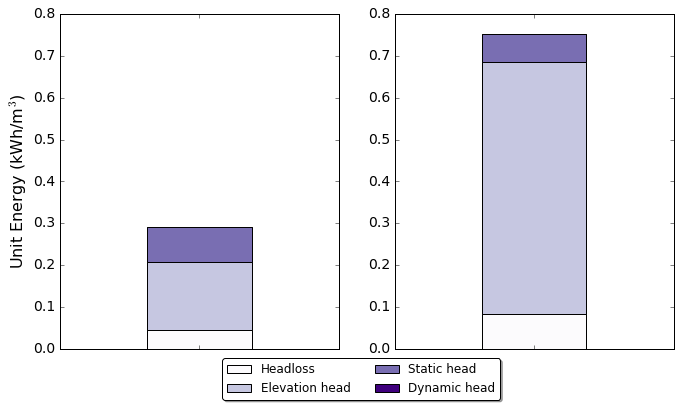

In [15]:
pump_plot_low=pump_plot_l[7:8]
pump_plot_high=pump_plot_h[7:8]
#pump_plot_high=pump_plot[(-1-1):-1]
fig = plt.figure(figsize=(11,6))
ax = fig.add_subplot(121) # Create matplotlib axes
ax2 = fig.add_subplot(122)
pump_plot_low.index=[" "]
pump_plot_high.index=[" "]
a=pump_plot_low.plot(kind='bar', stacked=True,ax=ax,legend=False,colormap='Purples',fontsize=14, width=0.3)
a.set_ylim(0,0.8)
b=pump_plot_high.plot(kind='bar', stacked=True,ax=ax2,legend=False,colormap='Purples',fontsize=14, width=0.3)
#pump_plot_high.plot(kind='bar', stacked=True,figsize=(6,6),legend=True,colormap='summer',fontsize=14)
a.set_ylabel('Unit Energy (kWh/m$^3$)',fontsize=16)
plt.legend(bbox_to_anchor=(0.4, -0.01),ncol=2, fancybox=True, shadow=True)


In [16]:
process_energy_y=process_energy_m3[['grid_ID','People', 'Pipe_capital_energy_final_y','Pump_capital_energy_final_y','Tank_capital_energy_final_y', 'Pipe_operat_energy_final_y', 'Pump_operat_energy_final_y','Pipe_construction_energy_final_y','Pipe_excavation_energy_final_y','Pipe_transport_energy_final_y','tank_const_energy_final_y','tank_transport_energy_final_y','pump_construction_energy_final_y','pump_transport_energy_final_y','Treatment_operational_energy_y','Treatment_capital_energy_y','RSF_capital_energy_y','RSF_operational_energy_y','CoagFlocc_Capital_energy_y','CoagFlocc_Operational_energy_y','Chlorine_operational_energy_y','Sludge_transport_energy_final_y','Total_conveyance_operational_energy_collection_y']]
process_energy_m3=process_energy_m3[['grid_ID','People', 'Pipe_capital_energy_final_y_m3','Pump_capital_energy_final_y_m3','Tank_capital_energy_final_y_m3', 'Pipe_operat_energy_final_y_m3', 'Pump_operat_energy_final_y_m3','Pipe_construction_energy_final_y_m3','Pipe_excavation_energy_final_y_m3','Pipe_transport_energy_final_y_m3','tank_const_energy_final_y_m3','tank_transport_energy_final_y_m3','pump_construction_energy_final_y_m3','pump_transport_energy_final_y_m3','Treatment_operational_energy_y_m3','Treatment_capital_energy_y_m3','RSF_capital_energy_y_m3','RSF_operational_energy_y_m3','CoagFlocc_Capital_energy_y_m3','CoagFlocc_Operational_energy_y_m3','Chlorine_operational_energy_y_m3','Sludge_transport_energy_final_y_m3','Total_conveyance_operational_energy_collection_y_m3']]
process_GHG_y=process_GHG_m3[['grid_ID','People', 'Pipe_capital_GHG_final_y','Pump_capital_GHG_final_y','Tank_capital_GHG_final_y', 'Pipe_operat_GHG_final_y', 'Pump_operat_GHG_final_y','Pipe_construction_GHG_final_y','Pipe_excavation_GHG_final_y','Pipe_transport_GHG_final_y','tank_const_GHG_final_y','tank_transport_GHG_final_y','pump_construction_GHG_final_y','pump_transport_GHG_final_y','Treatment_operational_GHG_y','Treatment_capital_GHG_y','RSF_capital_GHG_y','RSF_operational_GHG_y','CoagFlocc_Capital_GHG_y','CoagFlocc_Operational_GHG_y','Chlorine_operational_GHG_y','Sludge_transport_GHG_y','Sludge_disposal_GHG_y','Total_conveyance_operational_GHG_collection_y']]
process_GHG_m3=process_GHG_m3[['grid_ID','People', 'Pipe_capital_GHG_final_y_m3','Pump_capital_GHG_final_y_m3','Tank_capital_GHG_final_y_m3', 'Pipe_operat_GHG_final_y_m3', 'Pump_operat_GHG_final_y_m3','Pipe_construction_GHG_final_y_m3','Pipe_excavation_GHG_final_y_m3','Pipe_transport_GHG_final_y_m3','tank_const_GHG_final_y_m3','tank_transport_GHG_final_y_m3','pump_construction_GHG_final_y_m3','pump_transport_GHG_final_y_m3','Treatment_operational_GHG_y_m3','Treatment_capital_GHG_y_m3','RSF_capital_GHG_y_m3','RSF_operational_GHG_y_m3','CoagFlocc_Capital_GHG_y_m3','CoagFlocc_Operational_GHG_y_m3','Chlorine_operational_GHG_y_m3','Sludge_transport_GHG_y_m3','Sludge_disposal_GHG_y_m3','Total_conveyance_operational_GHG_collection_y_m3']]

In [17]:
total_energy_decentralized = pd.read_csv('total_energy_decentralized_m3.csv')
total_GHG_decentralized = pd.read_csv('total_GHG_decentralized_m3.csv')

In [18]:
#total_cost_decentralized_conveyance['Index']=total_cost_decentralized_conveyance.grid_ID.map(str)+" "+total_cost_decentralized_conveyance.People.map(str)
#total_cost['Index']=total_cost.grid_ID.map(str)+" "+total_cost.People.map(str)
#merged_cost = pd.merge(left=total_cost_decentralized_conveyance,right=total_cost, left_on='Index', right_on='Index')

total_energy_decentralized['Index']=total_energy_decentralized.grid_ID.map(str)+" "+total_energy_decentralized.People.map(str)
total_energy['Index']=total_energy.grid_ID.map(str)+" "+total_energy.People.map(str)
merged_energy = pd.merge(left=total_energy_decentralized,right=total_energy, left_on='Index', right_on='Index')

total_GHG_decentralized['Index']=total_GHG_decentralized.grid_ID.map(str)+" "+total_GHG_decentralized.People.map(str)
total_GHG['Index']=total_GHG.grid_ID.map(str)+" "+total_GHG.People.map(str)
merged_GHG = pd.merge(left=total_GHG_decentralized,right=total_GHG, left_on='Index', right_on='Index')

In [19]:
results2=merged_energy[(merged_energy['Total_Energy_final_y_m3'] < merged_energy['Total_Energy_final_central_y_m3'])][['grid_ID_x','People_x','Total_Energy_final_y_m3','Total_Energy_final_central_y_m3']]

In [20]:
results_GHG=merged_GHG[(merged_GHG['Total_GHG_final_y_m3'] < merged_GHG['Total_GHG_final_central_y_m3'])][['grid_ID_x','People_x','Total_GHG_final_y_m3','Total_GHG_final_central_y_m3']]

In [21]:
results2.to_csv('C:\Users\Olga\Documents\RENUWIT\Decentralization_SF\Decentralization_model\\results_decentral_best.csv')

In [22]:
results_GHG.to_csv('C:\Users\Olga\Documents\RENUWIT\Decentralization_SF\Decentralization_model\\results_decentral_best_ghg.csv')

In [23]:
diff=[]
grid_f=[]
peop_f=[]
for index,row in merged_energy.iterrows():
    if row[11]>row[23]:
        difference=row[11]-row[23]
        grid=row[0]
        peop=row[1]
        diff.append(difference)
        grid_f.append(grid)
        peop_f.append(peop)
        

In [24]:
diff_energy=zip(diff,grid_f,peop_f)
diff_energy_g=pd.DataFrame(diff_energy)

In [25]:
diff_energy_g.to_csv('C:\Users\Olga\Documents\RENUWIT\Decentralization_SF\Decentralization_model\\diff_energy_grid_centr.csv')

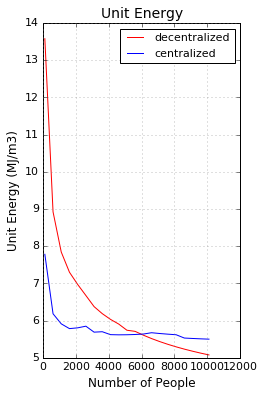

In [26]:
total_energy_decentralized_1=total_energy_decentralized[(total_energy_decentralized['grid_ID']==304)]
total_energy_1=total_energy[(total_energy['grid_ID']==304)]
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1,3,1)
plt.title('Unit Energy',fontsize=14)
a=plt.plot(total_energy_decentralized_1['People'],total_energy_decentralized_1['Total_Energy_final_y_m3'],'-r',label = 'decentralized')
b=plt.plot(total_energy_1['People'],total_energy_1['Total_Energy_final_central_y_m3'],'-b',label = 'centralized')
legend = plt.legend(frameon = 1, fontsize=11,loc='best')
plt.ylabel('Unit Energy (MJ/m3)',fontsize=12)
plt.xlabel('Number of People',fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
ax.yaxis.grid(color='gray', linestyle=':')
ax.xaxis.grid(color='gray', linestyle=':')

In [27]:
grouped_decentral_energy=total_energy_decentralized.groupby(total_energy_decentralized['grid_ID'])
grouped_central_energy=total_energy.groupby(total_energy['grid_ID'])
grouped_decentral_GHG=total_GHG_decentralized.groupby(total_GHG_decentralized['grid_ID'])
grouped_central_GHG=total_GHG.groupby(total_GHG['grid_ID'])

In [28]:
def group_in_cluster(dtframe1,field):
    grouped_decentral_energy=dtframe1.groupby(dtframe1[field])
    grid_ID_decentral=[[] for i in range(len(dtframe1))]
    for gr, item in grouped_decentral_energy:
        dt=item
        grid_ID_decentral[gr].append(dt)
    return grid_ID_decentral

In [29]:
grid_ID_decentral=group_in_cluster(total_energy_decentralized,'grid_ID')
grid_ID_central=group_in_cluster(total_energy,'grid_ID')
unique_grid_ID=total_energy_decentralized['grid_ID'].unique()
grid_ID_decentral_GHG=group_in_cluster(total_GHG_decentralized,'grid_ID')
grid_ID_central_GHG=group_in_cluster(total_GHG,'grid_ID')


In [30]:
grid_intersection=[]

for i in total_energy_decentralized['grid_ID'].unique():
    y1 = interp1d(grid_ID_decentral[i][0]['People'], grid_ID_decentral[i][0]['Total_Energy_final_y_m3'])
    y2 = interp1d(grid_ID_central[i][0]['People'], grid_ID_central[i][0]['Total_Energy_final_central_y_m3'])
    f = lambda x : y1(x) - y2(x)
    x1=100
    saving_decentral=(y2(10000) - y1(10000))
    saving_central=(y1(800) - y2(800))
    ysav_cen = y1(800)
            
    for x in reversed(range(100,10000,500)):
        if 0<(y1(10000) - y2(10000))<0.3 or 0<(y2(10000) - y1(10000))<0.3:
            x1=20000
            break
            
        if (y1(10000) - y2(10000))>0.3:
            x1=10000 
            y = y1(x1)
            break
            
        if f(10000)*f(x)<0:
            x1 =bisect(f, x, 10000)
            y = y1(x1)
            break
            
          
        if (y2(x) - y1(x))>saving_decentral:
            saving_decentral=(y2(x) - y1(x))
            ysav_decen = y1(x)

 
                
    grid_intersection.extend([(i,x1,y,saving_decentral,ysav_decen,saving_central,ysav_cen)])

min_people=pd.DataFrame(grid_intersection)
min_people.columns=['grid_ID','People','Energy_MJ_m3','energy_savings','decentral_value','energy_savings_central','decentral_value']    


In [31]:
grid_intersection=[]

for i in total_GHG_decentralized['grid_ID'].unique():
    y1 = interp1d(grid_ID_decentral_GHG[i][0]['People'], grid_ID_decentral_GHG[i][0]['Total_GHG_final_y_m3'])
    y2 = interp1d(grid_ID_central_GHG[i][0]['People'], grid_ID_central_GHG[i][0]['Total_GHG_final_central_y_m3'])
    f = lambda x : y1(x) - y2(x)
    x1=100
    saving=(y2(10000) - y1(10000))
    saving_central=(y1(800) - y2(800))
    ysav_cen = y1(800)
        
    for x in reversed(range(100,10000,500)):
        if 0<(y1(10000) - y2(10000))<0.01 or 0<(y2(10000) - y1(10000))<0.01:
            x1=20000
            
            break
            
        if (y1(10000) - y2(10000))>0.01:
            x1=10000
            y=y1(x1)
            break
            
        if f(10000)*f(x)<0:
            x1 =bisect(f, x, 10000)
            y = y1(x1)
            break
            
        if (y2(x) - y1(x))>saving:
            saving=(y2(x) - y1(x))
            ysav_decen = y1(x)
        
   
    grid_intersection.extend([(i,x1,y,saving,ysav_decen,saving_central,ysav_cen)])

min_people_GHG=pd.DataFrame(grid_intersection)
min_people_GHG.columns=['grid_ID','People','GHG_kg_m3','GHG_savings','decentral_value','GHG_savings_central','decentral_value']   

In [32]:
min_people.to_csv('C:\Users\Olga\Documents\RENUWIT\Decentralization_SF\Decentralization_model\\min_people_energy.csv')
min_people_GHG.to_csv('C:\Users\Olga\Documents\RENUWIT\Decentralization_SF\Decentralization_model\\min_people_GHG.csv')

In [33]:
process_energy_y=process_energy[['grid_ID','People', 'Pipe_capital_energy_final_y','Pump_capital_energy_final_y','Tank_capital_energy_final_y', 'Pipe_operat_energy_final_y', 'Pump_operat_energy_final_y','Pipe_construction_energy_final_y','Pipe_excavation_energy_final_y','Pipe_transport_energy_final_y','tank_const_energy_final_y','tank_transport_energy_final_y','pump_construction_energy_final_y','pump_transport_energy_final_y','Treatment_operational_energy_y','Treatment_capital_energy_y','RSF_capital_energy_y','RSF_operational_energy_y','CoagFlocc_Capital_energy_y','CoagFlocc_Operational_energy_y','Chlorine_operational_energy_y','Sludge_transport_energy_final_y','Total_conveyance_operational_energy_collection_y']]
process_energy_m3=process_energy[['grid_ID','People', 'Pipe_capital_energy_final_y_m3','Pump_capital_energy_final_y_m3','Tank_capital_energy_final_y_m3', 'Pipe_operat_energy_final_y_m3', 'Pump_operat_energy_final_y_m3','Pipe_construction_energy_final_y_m3','Pipe_excavation_energy_final_y_m3','Pipe_transport_energy_final_y_m3','tank_const_energy_final_y_m3','tank_transport_energy_final_y_m3','pump_construction_energy_final_y_m3','pump_transport_energy_final_y_m3','Treatment_operational_energy_y_m3','Treatment_capital_energy_y_m3','RSF_capital_energy_y_m3','RSF_operational_energy_y_m3','CoagFlocc_Capital_energy_y_m3','CoagFlocc_Operational_energy_y_m3','Chlorine_operational_energy_y_m3','Sludge_transport_energy_final_y_m3','Total_conveyance_operational_energy_collection_y_m3']]
process_GHG_y=process_GHG[['grid_ID','People', 'Pipe_capital_GHG_final_y','Pump_capital_GHG_final_y','Tank_capital_GHG_final_y', 'Pipe_operat_GHG_final_y', 'Pump_operat_GHG_final_y','Pipe_construction_GHG_final_y','Pipe_excavation_GHG_final_y','Pipe_transport_GHG_final_y','tank_const_GHG_final_y','tank_transport_GHG_final_y','pump_construction_GHG_final_y','pump_transport_GHG_final_y','Treatment_operational_GHG_y','Treatment_capital_GHG_y','RSF_capital_GHG_y','RSF_operational_GHG_y','CoagFlocc_Capital_GHG_y','CoagFlocc_Operational_GHG_y','Chlorine_operational_GHG_y','Sludge_transport_GHG_y','Sludge_disposal_GHG_y','Total_conveyance_operational_GHG_collection_y']]
process_GHG_m3=process_GHG[['grid_ID','People', 'Pipe_capital_GHG_final_y_m3','Pump_capital_GHG_final_y_m3','Tank_capital_GHG_final_y_m3', 'Pipe_operat_GHG_final_y_m3', 'Pump_operat_GHG_final_y_m3','Pipe_construction_GHG_final_y_m3','Pipe_excavation_GHG_final_y_m3','Pipe_transport_GHG_final_y_m3','tank_const_GHG_final_y_m3','tank_transport_GHG_final_y_m3','pump_construction_GHG_final_y_m3','pump_transport_GHG_final_y_m3','Treatment_operational_GHG_y_m3','Treatment_capital_GHG_y_m3','RSF_capital_GHG_y_m3','RSF_operational_GHG_y_m3','CoagFlocc_Capital_GHG_y_m3','CoagFlocc_Operational_GHG_y_m3','Chlorine_operational_GHG_y_m3','Sludge_transport_GHG_y_m3','Sludge_disposal_GHG_y_m3','Total_conveyance_operational_GHG_collection_y_m3']]

In [34]:
total_energy_y=total_energy[['grid_ID','People', 'Total_conveyance_capital_energy_central_y','Total_conveyance_operational_energy_central_y', 'Total_Treatment_capital_energy_y','Total_Treatment_operational_energy_y','Total_Energy_final_central_y','Total_conveyance_operational_energy_collection_y']]
total_energy_m3=total_energy[['grid_ID','People', 'Total_conveyance_capital_energy_central_y_m3','Total_conveyance_operational_energy_central_y_m3', 'Total_Treatment_operational_energy_y_m3','Total_Treatment_operational_energy_y_m3','Total_Energy_final_central_y_m3','Total_conveyance_operational_energy_collection_y_m3']]
total_GHG_y=total_GHG[['grid_ID','People', 'Total_conveyance_capital_GHG_central_y','Total_conveyance_operational_GHG_central_y', 'Total_Treatment_capital_GHG_y','Total_Treatment_operational_GHG_y','Total_GHG_final_central_y','Total_conveyance_operational_GHG_collection_y']]
total_GHG_m3=total_GHG[['grid_ID','People', 'Total_conveyance_capital_GHG_central_y_m3','Total_conveyance_operational_GHG_central_y_m3', 'Total_Treatment_capital_GHG_y_m3','Total_Treatment_operational_GHG_y_m3','Total_GHG_final_central_y_m3','Total_conveyance_operational_GHG_collection_y_m3']]

In [35]:
total_energy_y.to_csv('C:\Users\Olga\Documents\RENUWIT\Decentralization_SF\Decentralization_model\\total_energy_centralized_y.csv')
total_energy_m3.to_csv('C:\Users\Olga\Documents\RENUWIT\Decentralization_SF\Decentralization_model\\total_energy_centralized_m3.csv')
total_GHG_y.to_csv('C:\Users\Olga\Documents\RENUWIT\Decentralization_SF\Decentralization_model\\total_GHG_centralized_y.csv')
total_GHG_m3.to_csv('C:\Users\Olga\Documents\RENUWIT\Decentralization_SF\Decentralization_model\\total_GHG_centralized_m3.csv')
process_energy_y.to_csv('C:\Users\Olga\Documents\RENUWIT\Decentralization_SF\Decentralization_model\\process_energy_centralized_y.csv')
process_energy_m3.to_csv('C:\Users\Olga\Documents\RENUWIT\Decentralization_SF\Decentralization_model\\process_energy_centralized_m3.csv')
process_GHG_y.to_csv('C:\Users\Olga\Documents\RENUWIT\Decentralization_SF\Decentralization_model\\process_GHG_centralized_y.csv')
process_GHG_m3.to_csv('C:\Users\Olga\Documents\RENUWIT\Decentralization_SF\Decentralization_model\\process_GHG_centralized_m3.csv')